# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

/home/zerosum24/.conda/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [2]:
# Your Code goes here:

data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase = pd.read_csv(data_path, delimiter = ',')

print("The number of instances {0} and the attributes {1}".format(spambase.shape[0], spambase.shape[1]))
spambase.head(5)

The number of instances 4601 and the attributes 55


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [3]:
# Your Code goes here:
X = spambase.drop(columns=['is_spam'], axis=1).values
y = spambase.is_spam.values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)

***My answer:***

Random_state is the argument which must be set to 0 in order to reproduce your results exactly.

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [4]:
# Your Code goes here:

from sklearn.metrics import accuracy_score

#Training the Logistic Regression Classifier
lrc = LogisticRegression(solver='lbfgs')
lrc.fit(X_train, y_train)

print("Classification Accuracy on the training set: {0:.3f}".format(lrc.score(X_train, y_train)))
print("Classification Accuracy on the testing set: {0:.3f}".format(lrc.score(X_test, y_test)))


Classification Accuracy on the training set: 0.935
Classification Accuracy on the testing set: 0.928


***My answer:***

The classifier does appear to generalise well on unseen data. It certainly does not seem as though it is overfit to the training data, as the classification accuracy on both the training and testing set is roughly the same.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [5]:
# Your Code goes here:

hp_idx = spambase.columns.get_loc('word_freq_hp_binarized')
dollar_idx = spambase.columns.get_loc('char_freq_$_binarized')

print("Coefficient for the hp attribute: {0:.3f}".format(lrc.coef_[0, hp_idx]))
print("Coefficient for the dollar attribute: {0:.3f}".format(lrc.coef_[0, dollar_idx]))

Coefficient for the hp attribute: -2.639
Coefficient for the dollar attribute: 1.699


***Your answer goes here:***

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [6]:
# Your Code goes here:

lsv = LinearSVC()
lsv.fit(X_train, y_train)

print("Classification Accuracy on the training set: {0:.3f}".format(lsv.score(X_train, y_train)))
print("Classification Accuracy on the testing set: {0:.3f}".format(lsv.score(X_test, y_test)))

Classification Accuracy on the training set: 0.935
Classification Accuracy on the testing set: 0.920


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [7]:
# Your Code goes here:

hp_idx = spambase.columns.get_loc('word_freq_hp_binarized')
dollar_idx = spambase.columns.get_loc('char_freq_$_binarized')

print("Coefficient for the hp attribute: {0:.3f}".format(lsv.coef_[0, hp_idx]))
print("Coefficient for the dollar attribute: {0:.3f}".format(lsv.coef_[0, dollar_idx]))

Coefficient for the hp attribute: -0.857
Coefficient for the dollar attribute: 0.569


***Your answer goes here:***

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***Your answer goes here:***

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [8]:
# Your Code goes here:

# SVC with Gaussian

# Training svc with rbf
svc_rbf = SVC(kernel='rbf').fit(X_train, y_train)

# Printing Classification Accuracies
print('\nSVC with Gaussian')
print('-----------------\n')
print("Classification Accuracy on the training set: {0:.3f}".format(svc_rbf.score(X_train, y_train)))
print("Classification Accuracy on the testing set: {0:.3f}".format(svc_rbf.score(X_test, y_test)))

# SVC with Polynomial
print('\n\nSVC with Polynomial')
print('-------------------\n')
svc_poly = SVC(kernel='poly').fit(X_train, y_train)

# Printing Classification Accuracies
print("Classification Accuracy on the training set: {0:.3f}".format(svc_poly.score(X_train, y_train)))
print("Classification Accuracy on the testing set: {0:.3f}".format(svc_poly.score(X_test, y_test)))



SVC with Gaussian
-----------------

Classification Accuracy on the training set: 0.934
Classification Accuracy on the testing set: 0.931


SVC with Polynomial
-------------------

Classification Accuracy on the training set: 0.800
Classification Accuracy on the testing set: 0.809


***Your answer goes here:***

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [9]:
# Load Splice Train Here

# Loading the splice_train dataset:

data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path)
print('Number of instances: {}, number of attributes: {}'.format(splice_train.shape[0], splice_train.shape[1]))
splice_train.head(10)

Number of instances: 2935, number of attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [10]:
# Load Splice Test Here

# Loading the splice_test dataset:

data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path)
print('Number of instances: {}, number of attributes: {}'.format(splice_test.shape[0], splice_test.shape[1]))
splice_test.head(10)

Number of instances: 255, number of attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [31]:
# Convert the categorical attributes into numeric ones by using the get_dummies(...) function:

# creating a new type to ensure the values d,n,s,r have the correct types
ctype = CategoricalDtype(['A', 'G', 'T', 'C', 'D', 'N', 'R', 'S'])

# converting the dataframes into 1 hot data
splice_train_1hot = pd.get_dummies(splice_train.drop('class', axis=1).astype(ctype))
splice_test_1hot = pd.get_dummies(splice_test.drop('class', axis=1).astype(ctype))


### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [32]:
# Storing the training and testing data and displaying the shapes:

# The training set
X_train = splice_train_1hot.values
y_train = splice_train['class'].values

# The testing set
X_test = splice_test_1hot.values
y_test = splice_test['class'].values

# Printing the shapes of the four arrays
print("The shapes of the training set: X_train {0},y_train {1}".format(X_train.shape, y_train.shape))
print("The shapes of the testing set: X_test {0}, y_test {1}".format(X_test.shape, y_test.shape))

The shapes of the training set: X_train (2935, 480),y_train (2935,)
The shapes of the testing set: X_test (255, 480), y_test (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [42]:
# Using a KNeighborsClassifier and reporting the classification accuracy:

# Training the KNeighboursClassifier
knc = KNeighboursClassifier(n_neighbors=1)
knc.fit(X=X_train, y=y_train)

# Predicting the output of the training set
y_pred = knc.predict(X_train)

# Calculating and printing the accuracy score
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred)
print("The classification accuracy on the training set is {0:.3f} (to 3 decimal places)".format(accuracy))

The classification accuracy on the training set is 1.000 (to 3 decimal places)


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***My answer:***

The above result is not meaningful. Clustering all the values into 1 cluster in a nearest neighbour classifier should have no predictive value. I expect the performance to be this good because it will match any set of values being all the cluster is all encompassing, and has been greatly overfit to the training data as a result.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [43]:
# Your Code goes here:

# Predicting the output of the testing set
y_pred = knc.predict(X_test)

# Calculating and printing the accuracy score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("The classification accuracy on the training set is {0:.3f} (to 3 decimal places)".format(accuracy))

The classification accuracy on the training set is 0.745 (to 3 decimal places)


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

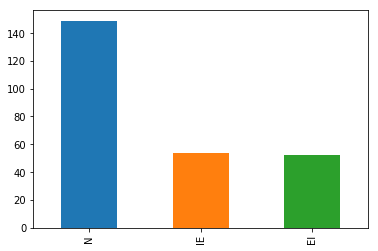

In [57]:
# Plotting a histogram of the target variable (i.e. class) in the test set:

class_counts = splice_test['class'].value_counts()
ax = class_counts.plot(kind="bar")

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [16]:
# Your Code goes here:

### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [17]:
# Your Code goes here:

***Your answer goes here:***

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

In [18]:
# Your Code goes here:

***Your answer goes here:***

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [19]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

In [20]:
# Your Code goes here:

***Your answer goes here:***

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

In [21]:
# Your Code goes here:

***Your answer goes here:***

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:***